<a href="https://colab.research.google.com/github/Tristant2005/Cheminformatics/blob/main/Linear_vs_Multiple_Linear_Regression_Solubility_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Predicting Solubility of Compounds by Molecular Weight**
Attempting to find a relation between the relative solubility of molecules and theis molecular weights using linear regression

https://www.youtube.com/watch?v=M66ADCDAdOI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Load Data
Use pandas to make a dataframe

In [5]:
df = pd.read_excel('solubility_lr.xlsx')
df.head()

,Compound ID,MolWt,log_sol
0,"1,1,1,2-Tetrachloroethane",167.850,-2.18
1,"1,1,1-Trichloroethane",133.405,-2.00
2,"1,1,2,2-Tetrachloroethane",167.850,-1.74
3,"1,1,2-Trichloroethane",133.405,-1.48
4,"1,1,2-Trichlorotrifluoroethane",187.375,-3.04


In [6]:
df.describe()
# 1144 itmes

,MolWt,log_sol
count,1144.000000,1144.000000
mean,204.631675,-3.057997
std,102.620500,2.096502
min,16.043000,-11.600000
25%,122.126000,-4.332250
50%,183.594500,-2.870500
75%,270.715750,-1.600000
max,780.949000,1.580000


# Graphical Analysis

Text(0.5, 0, 'MolWt')

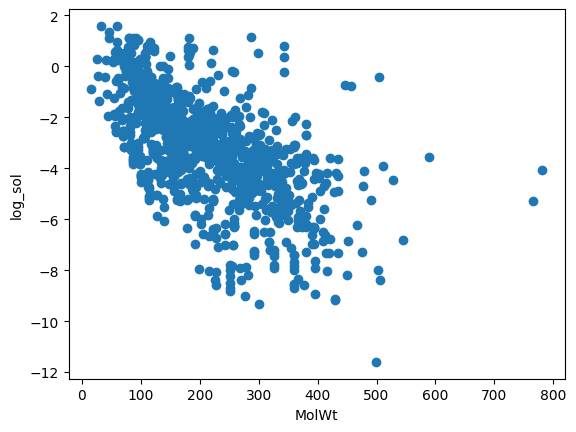

In [7]:
# Our dependant variable in this case would be solubillity, our target.
y = df['log_sol']
x1 = df['MolWt']

plt.scatter(x1, y)
plt.ylabel('log_sol')
plt.xlabel('MolWt')

# Linear Regression Using Statsmodel

In [8]:
'''
Take equation y = mx + b:
statsmodels takes equation y = mx + bx'

Therefore we need to set x' to be held constant at 1 in order to make that line
'''
x = sm.add_constant(x1)

#Ordinary least squares (OLS) -> Linear regression model
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                log_sol   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     781.1
Date:                Sat, 23 Nov 2024   Prob (F-statistic):          2.11e-131
Time:                        21:06:15   Log-Likelihood:                -2171.5
No. Observations:                1144   AIC:                             4347.
Df Residuals:                    1142   BIC:                             4357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3936      0.107     -3.691      0.0

Text(0.5, 0, 'MolWt')

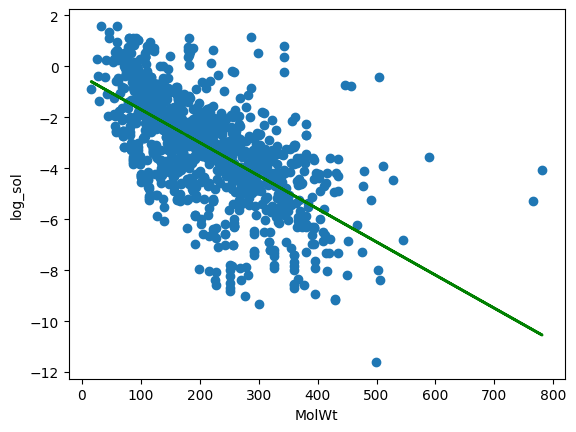

In [9]:
'''
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3936      0.107     -3.691      0.000      -0.603      -0.184
MolWt         -0.0130      0.000    -27.949      0.000      -0.014      -0.012
==============================================================================
From this, find our y = mx + b

b = -0.3936
m = -0.0130

y = -0.0130x + -0.3936


R-squared = 0.406
This implies that molecular Weight only explains about 41% of the variability of our solubility.
'''

regression_eq1 = -0.0130 * x1 + -0.3936

plt.scatter(x1, y)
plt.plot(x1, regression_eq1, color='green', linewidth=2)
plt.ylabel('log_sol')
plt.xlabel('MolWt')

# Liner Regression Library with Sklearn

Alterior method for finding regression equations

In [10]:
from sklearn.linear_model import LinearRegression

# X1 is of shape (1144,) -> reshape to (1144, 1)
x = x1.values.reshape(1144,1)

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [11]:
# returns r squared value
r_sqr = lr.score(x, y)
coef = lr.coef_
intercept = lr.intercept_

print("m:", coef)           # -0.01302031
print("b:", intercept)      # -0.3936286635092823
print("Accuracy:", r_sqr)   # 1.0

regression_eq2 = coef * x1 + intercept

m: [-0.01302031]
b: -0.3936286635092845
Accuracy: 0.40618197739898676


Text(0.5, 0, 'MolWt')

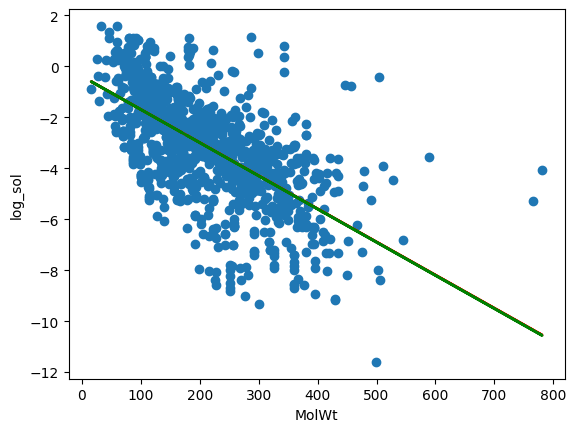

In [12]:
plt.scatter(x1, y)
plt.plot(x1, regression_eq1, color='red', linewidth=2)
plt.plot(x1, regression_eq2, color='green', linewidth=2)
plt.ylabel('log_sol')
plt.xlabel('MolWt')

Both regression equations are very similar

# Use Model

In [3]:
while (1):
  try:
    weight = int(input("Input you molecular weight: "))
    print("Solubillity:", lr.predict([[weight]]))
  except:
      print("Please provide a number")
      break

Input you molecular weight: break
Please provide a number


# **Part 2: Predicting Solubillity of Compounds Using Multiple Features**
Attempting to predict relative solubility of molecules using molecular weight and lipophilicity using multiple linear regression

https://www.youtube.com/watch?v=JHwKv7a7J3U&t=25s

# Load Data2

In [77]:
df = pd.read_excel('solubility_mlr.xlsx')
df.describe()

,measured log(solubility:mol/L),MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.0,1144.000000,1144.0,1144.000000,1144.0,1144.000000
mean,-3.057997,9.904794,9.904794,1.107795,-3.158068,0.553755,36.531554,204.631675,192.199969,204.151949,...,0.029720,0.022727,0.003497,0.013112,0.0,0.006119,0.0,0.001748,0.0,0.074301
std,2.096502,2.691606,2.691606,1.152689,1.614930,0.149406,22.206241,102.620500,99.248636,102.282168,...,0.169889,0.176009,0.059054,0.113804,0.0,0.078018,0.0,0.041794,0.0,0.275390
min,-11.600000,3.125000,3.125000,0.000247,-6.760705,0.146432,8.000000,16.043000,12.011000,16.031300,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,-4.332250,7.609230,7.609230,0.220988,-4.208314,0.451232,20.657895,122.126000,112.087000,122.010072,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,-2.870500,8.636000,8.636000,0.670265,-3.418099,0.534175,29.500000,183.594500,172.146000,183.493400,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,-1.600000,12.389802,12.389802,1.605903,-2.492253,0.652274,45.475000,270.715750,258.067500,270.505870,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,1.580000,20.442813,20.442813,4.256952,1.597222,0.934235,130.857143,780.949000,716.437000,780.429607,...,1.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,2.000000


In [78]:
# All features we will be comparing solubility to
df.columns.values

array(['Compound ID', 'measured log(solubility:mol/L)',
       'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n',
       'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1',
       'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',

Text(0.5, 0, 'BalabanJ')

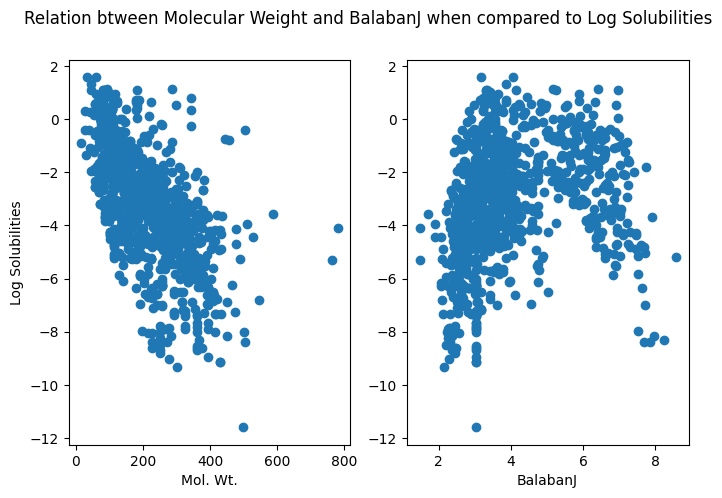

In [93]:
# BalabanJ -> Balaban's J descriptor. Based on Graph theory that provides information on branching and cyclicity

y = df[['measured log(solubility:mol/L)']]
x1 = df[['MolWt', 'BalabanJ']]

fig = plt.figure(2, figsize = (8, 5))
fig.suptitle("Relation btween Molecular Weight and BalabanJ when compared to Log Solubilities")

ax1 = fig.add_subplot(121)
plt.scatter(x1['MolWt'], y)
ax1.set_xlabel('Mol. Wt.')
ax1.set_ylabel('Log Solubilities')

ax2 = fig.add_subplot(122)
plt.scatter(x1['BalabanJ'], y)
ax2.set_xlabel('BalabanJ')


In [ ]:
'''
# Generates given OLS Regression Results

==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2880      0.226     -1.277      0.202      -0.731       0.155
MolWt         -0.0131      0.001    -25.436      0.000      -0.014      -0.012
BalabanJ      -0.0207      0.039     -0.531      0.595      -0.097       0.056
==============================================================================

The Higher P>|t|, the less relevant the descriptor is at fitting to the target.
'''

Text(0.5, 0, 'MolLogP')

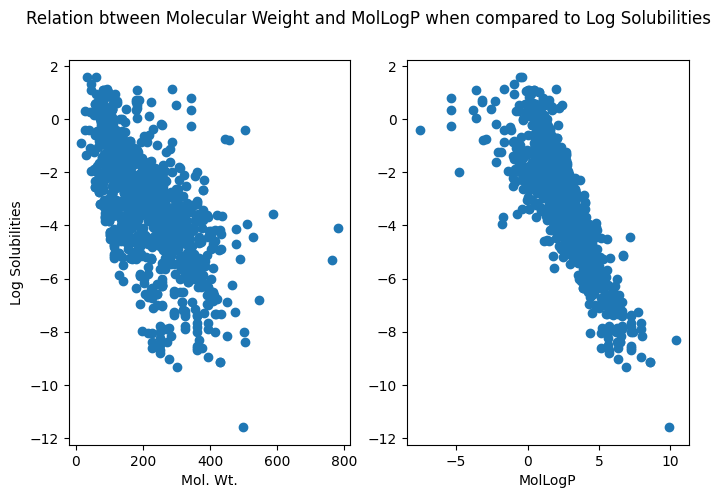

In [98]:
# MolLogP -> Wildman-Crippin LogP. Measure of a molecule's liposhilicity or hydrophobicity.
# This is a better descriptor to use to predict solubility than the BalabanJ index

y = df[['measured log(solubility:mol/L)']]
x1 = df[['MolWt', 'MolLogP']]

fig = plt.figure(2, figsize = (8, 5))
fig.suptitle("Relation btween Molecular Weight and MolLogP when compared to Log Solubilities")

ax1 = fig.add_subplot(121)
plt.scatter(x1['MolWt'], y)
ax1.set_xlabel('Mol. Wt.')
ax1.set_ylabel('Log Solubilities')

ax2 = fig.add_subplot(122)
plt.scatter(x1['MolLogP'], y)
ax2.set_xlabel('MolLogP')

# Multiple Linear Regression Using Statsmodel

In [99]:
#Ordinary least squares (OLS) -> Linear regression model
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     measured log(solubility:mol/L)   R-squared:                       0.765
Model:                                        OLS   Adj. R-squared:                  0.765
Method:                             Least Squares   F-statistic:                     1861.
Date:                            Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                                    06:14:01   Log-Likelihood:                -1640.3
No. Observations:                            1144   AIC:                             3287.
Df Residuals:                                1141   BIC:                             3302.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

Text(0.5, 0, 'MolLogP')

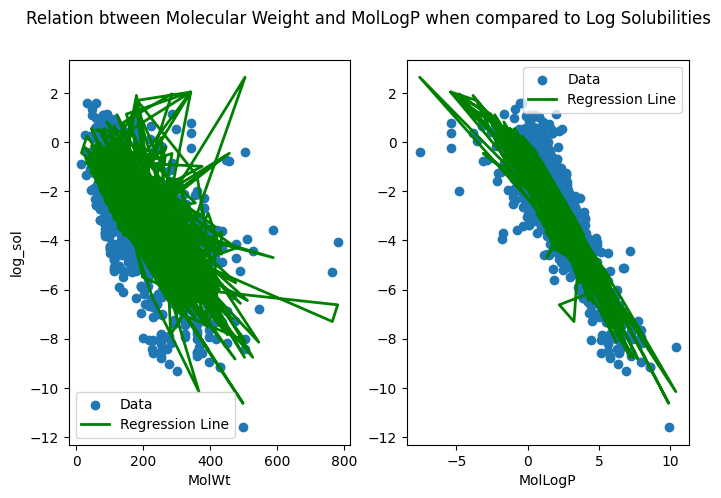

In [100]:
'''
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1454      0.068      2.129      0.033       0.011       0.279
MolWt         -0.0065      0.000    -19.711      0.000      -0.007      -0.006
MolLogP       -0.7620      0.018    -41.798      0.000      -0.798      -0.726
==============================================================================

R-squared = 0.765
This implies that molecular Weight & MolLogP explains about 77% of the variability of our solubility.
This is a large improvement over the previous model.

y = 0.1454 - 0.0065 * x1['MolWt'] - 0.7620 * x1['MolLogP']
'''

regression_equation = 0.1454 - 0.0065 * x1['MolWt'] - 0.7620 * x1['MolLogP']


fig = plt.figure(2, figsize = (8, 5))
fig.suptitle("Relation btween Molecular Weight and MolLogP when compared to Log Solubilities")

ax1 = fig.add_subplot(121)
plt.scatter(x1['MolWt'], y, label="Data")
plt.plot(x1['MolWt'], regression_equation, color='green', linewidth=2, label="Regression Line")
plt.legend()
ax1.set_ylabel('log_sol')
ax1.set_xlabel('MolWt')

ax2 = fig.add_subplot(122)
plt.scatter(x1['MolLogP'], y, label="Data")
plt.plot(x1['MolLogP'], regression_equation, color='green', linewidth=2, label="Regression Line")
plt.legend()
ax2.set_xlabel('MolLogP')

# Using Sklearn

In [101]:
lr = LinearRegression()
lr.fit(x1,y)

LinearRegression()

In [102]:
r_sqr = lr.score(x1, y)
coef = lr.coef_
intercept = lr.intercept_

# two coefficients!
regression_equation = intercept - (coef[0][0] * x1['MolWt']) - (coef[0][1] * x1['MolLogP'])
print(regression_equation)

0       3.219935
1       2.828057
2       3.218716
3       2.563178
4       3.594031
          ...   
1139    3.538030
1140    4.622055
1141    4.910728
1142    4.416264
1143    2.857005
Length: 1144, dtype: float64


In [103]:
# predicted solubilities for each entry in array
yhat = lr.predict(x1)
yhat

array([[-2.92911602],
       [-2.53723749],
       [-2.92789678],
       ...,
       [-4.61990853],
       [-4.12544409],
       [-2.56618536]])

Text(0, 0.5, 'Predicted Log Solubilities')

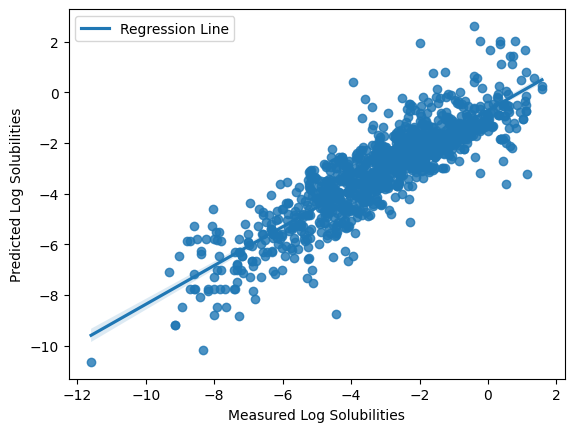

In [104]:
import seaborn as sns
sns.regplot(x=y, y=yhat, scatter_kws={'label': 'Data Points'}, line_kws={'label': 'Regression Line'})

plt.legend()
plt.xlabel('Measured Log Solubilities')
plt.ylabel('Predicted Log Solubilities')